In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import requests

In [3]:
from fake_useragent import UserAgent

In [4]:
def pivot_dict(lst, key):
    return {d.pop(key): d for d in lst}

In [5]:
agent = UserAgent()

In [6]:
headers = {
    'User-Agent': agent.google
}

In [7]:
params = {
    "LeagueID": "00",
    "PlayerOrTeam": "T",
    "Season": "2015-16",
    "SeasonType": "Regular Season",
    "Sorter": "DATE",
    "Direction": "ASC"
}

In [8]:
r = requests.get(url='http://stats.nba.com/stats/leaguegamelog',
                 headers=headers,
                 params=params)

In [9]:
result_sets = pivot_dict(r.json().get('resultSets'), key='name')

In [10]:
df = pd.DataFrame.from_records(data=result_sets['LeagueGameLog']['rowSet'],
                               columns=result_sets['LeagueGameLog']['headers'])

In [11]:
df.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22015,1610612737,ATL,Atlanta Hawks,0021500001,2015-10-27,ATL vs. DET,L,240,37,...,33,40,22,9,4,15,25,94,-12,1
1,22015,1610612765,DET,Detroit Pistons,0021500001,2015-10-27,DET @ ATL,W,240,37,...,36,59,23,5,3,15,15,106,12,1
2,22015,1610612739,CLE,Cleveland Cavaliers,0021500002,2015-10-27,CLE @ CHI,L,240,38,...,39,50,26,5,7,11,21,95,-2,1
3,22015,1610612741,CHI,Chicago Bulls,0021500002,2015-10-27,CHI vs. CLE,W,240,37,...,40,47,13,6,10,13,22,97,2,1
4,22015,1610612740,NOP,New Orleans Pelicans,0021500003,2015-10-27,NOP @ GSW,L,240,35,...,25,33,21,9,3,19,26,95,-16,1


In [12]:
df.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE'],
      dtype='object')

In [13]:
pivot_table = df.pivot_table(index='GAME_ID', 
                             columns='WL', 
                             values='TEAM_ABBREVIATION', 
                             aggfunc=lambda s: s.iloc[0])

In [14]:
pivot_table.head()

WL,L,W
GAME_ID,,
0021500001,ATL,DET
0021500002,CLE,CHI
0021500003,NOP,GSW
0021500004,ORL,WAS
0021500005,PHI,BOS


In [15]:
G = nx.from_pandas_dataframe(df=pivot_table,
                             source='L',
                             target='W',
                             edge_attr=True,
                             create_using=nx.MultiDiGraph())

In [16]:
list(G.nodes())[:5]

['GSW', 'LAL', 'NOP', 'CHA', 'SAS']

In [17]:
G.node['GSW']

{}

In [18]:
G['GSW']

{'BOS': {0: {}},
 'DAL': {0: {}},
 'DEN': {0: {}},
 'DET': {0: {}},
 'LAL': {0: {}},
 'MIL': {0: {}},
 'MIN': {0: {}},
 'POR': {0: {}},
 'SAS': {0: {}}}

In [19]:
G['PHI']

{'ATL': {0: {}, 1: {}, 2: {}},
 'BKN': {0: {}, 1: {}},
 'BOS': {0: {}, 1: {}, 2: {}, 3: {}},
 'CHA': {0: {}, 1: {}, 2: {}, 3: {}},
 'CHI': {0: {}, 1: {}, 2: {}, 3: {}},
 'CLE': {0: {}, 1: {}, 2: {}, 3: {}},
 'DAL': {0: {}, 1: {}},
 'DEN': {0: {}, 1: {}},
 'DET': {0: {}, 1: {}, 2: {}, 3: {}},
 'GSW': {0: {}, 1: {}},
 'HOU': {0: {}, 1: {}},
 'IND': {0: {}, 1: {}, 2: {}},
 'LAC': {0: {}, 1: {}},
 'LAL': {0: {}},
 'MEM': {0: {}, 1: {}},
 'MIA': {0: {}, 1: {}, 2: {}},
 'MIL': {0: {}, 1: {}, 2: {}},
 'MIN': {0: {}},
 'NOP': {0: {}},
 'NYK': {0: {}, 1: {}, 2: {}, 3: {}},
 'OKC': {0: {}, 1: {}},
 'ORL': {0: {}, 1: {}, 2: {}},
 'POR': {0: {}},
 'SAC': {0: {}},
 'SAS': {0: {}, 1: {}},
 'TOR': {0: {}, 1: {}, 2: {}, 3: {}},
 'UTA': {0: {}, 1: {}},
 'WAS': {0: {}, 1: {}, 2: {}, 3: {}}}

In [20]:
G['PHI']['GSW']

{0: {}, 1: {}}

In [21]:
G.in_degree('GSW')

73

In [22]:
G.out_degree('GSW')

9

In [23]:
nx.readwrite.node_link_data(G).get('nodes')

[{'name': 'GSW'},
 {'name': 'LAL'},
 {'name': 'NOP'},
 {'name': 'CHA'},
 {'name': 'SAS'},
 {'name': 'POR'},
 {'name': 'PHI'},
 {'name': 'MIN'},
 {'name': 'BKN'},
 {'name': 'MIA'},
 {'name': 'UTA'},
 {'name': 'ORL'},
 {'name': 'MEM'},
 {'name': 'SAC'},
 {'name': 'CLE'},
 {'name': 'OKC'},
 {'name': 'HOU'},
 {'name': 'TOR'},
 {'name': 'NYK'},
 {'name': 'DET'},
 {'name': 'IND'},
 {'name': 'MIL'},
 {'name': 'LAC'},
 {'name': 'DEN'},
 {'name': 'ATL'},
 {'name': 'WAS'},
 {'name': 'BOS'},
 {'name': 'DAL'},
 {'name': 'PHX'},
 {'name': 'CHI'}]

In [24]:
nx.readwrite.node_link_data(G, attrs=dict(name='abbr')).get('nodes')

[{'abbr': 'GSW'},
 {'abbr': 'LAL'},
 {'abbr': 'NOP'},
 {'abbr': 'CHA'},
 {'abbr': 'SAS'},
 {'abbr': 'POR'},
 {'abbr': 'PHI'},
 {'abbr': 'MIN'},
 {'abbr': 'BKN'},
 {'abbr': 'MIA'},
 {'abbr': 'UTA'},
 {'abbr': 'ORL'},
 {'abbr': 'MEM'},
 {'abbr': 'SAC'},
 {'abbr': 'CLE'},
 {'abbr': 'OKC'},
 {'abbr': 'HOU'},
 {'abbr': 'TOR'},
 {'abbr': 'NYK'},
 {'abbr': 'DET'},
 {'abbr': 'IND'},
 {'abbr': 'MIL'},
 {'abbr': 'LAC'},
 {'abbr': 'DEN'},
 {'abbr': 'ATL'},
 {'abbr': 'WAS'},
 {'abbr': 'BOS'},
 {'abbr': 'DAL'},
 {'abbr': 'PHX'},
 {'abbr': 'CHI'}]

In [25]:
nx.pagerank_numpy(G)

{'ATL': 0.03696159371545701,
 'BKN': 0.019367015159107513,
 'BOS': 0.04006195924721035,
 'CHA': 0.0353407051784611,
 'CHI': 0.03784445175248295,
 'CLE': 0.04306832673371957,
 'DAL': 0.03320400668185945,
 'DEN': 0.03334150280022405,
 'DET': 0.039288150304441036,
 'GSW': 0.06244845847313677,
 'HOU': 0.03423497160160184,
 'IND': 0.035596949702101935,
 'LAC': 0.03823280294329821,
 'LAL': 0.01932007738125768,
 'MEM': 0.029622485096883013,
 'MIA': 0.03579634652935044,
 'MIL': 0.029525573248720415,
 'MIN': 0.028457863450031082,
 'NOP': 0.025638941817889636,
 'NYK': 0.02424127212375859,
 'OKC': 0.04304775975656438,
 'ORL': 0.025406089146804915,
 'PHI': 0.008985633236028159,
 'PHX': 0.019967579936933027,
 'POR': 0.03710784103294628,
 'SAC': 0.026108301714839514,
 'SAS': 0.053017629215931804,
 'TOR': 0.044300209909058766,
 'UTA': 0.0288474303673206,
 'WAS': 0.031618071742580044}

In [26]:
nx.set_node_attributes(G, 'pagerank', nx.pagerank_numpy(G))

In [27]:
G.node['GSW']

{'pagerank': 0.06244845847313677}

In [28]:
node_size = np.asarray(list(nx.get_node_attributes(G, 'pagerank').values()))

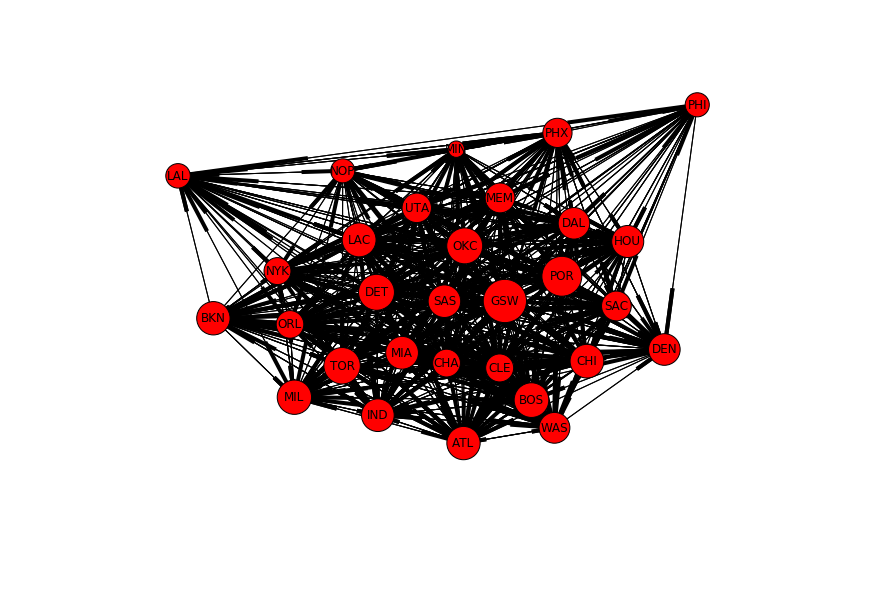

In [29]:
fig, ax = plt.subplots(figsize=(15, 10))
nx.draw(G, ax=ax, with_labels=True, node_size=300*100*node_size)

In [30]:
np.allclose(np.asarray(list(nx.pagerank_numpy(G).values())), 
            np.asarray(list(nx.pagerank_scipy(G).values())), atol=1e-6)

True

In [31]:
nx.google_matrix(G)

matrix([[ 0.005     ,  0.09944444,  0.005     ,  0.005     ,  0.09944444,
          0.09944444,  0.005     ,  0.09944444,  0.005     ,  0.005     ,
          0.005     ,  0.005     ,  0.005     ,  0.005     ,  0.005     ,
          0.005     ,  0.005     ,  0.005     ,  0.005     ,  0.09944444,
          0.005     ,  0.09944444,  0.005     ,  0.09944444,  0.005     ,
          0.005     ,  0.09944444,  0.09944444,  0.005     ,  0.005     ],
        [ 0.04423077,  0.005     ,  0.01807692,  0.03115385,  0.05730769,
          0.04423077,  0.01807692,  0.03115385,  0.005     ,  0.01807692,
          0.04423077,  0.01807692,  0.04423077,  0.05730769,  0.03115385,
          0.05730769,  0.05730769,  0.03115385,  0.03115385,  0.01807692,
          0.03115385,  0.01807692,  0.05730769,  0.04423077,  0.03115385,
          0.01807692,  0.01807692,  0.04423077,  0.04423077,  0.03115385],
        [ 0.05403846,  0.03769231,  0.005     ,  0.02134615,  0.05403846,
          0.05403846,  0.02134615,  